# Parte 1: Analytics

## **Sumário**

* 1. Lendo Base de Dados
* 2. Análise exploratória
    * 2.1. Entendendo as Variáveis
    * 2.2. Entendendo Variáveis de receita bruta e margem
* **3. Respondendo: 10 itens de maior relevância e os top 15 itens que acompanham cada um deles**
    * 3.1. Lógica para Construção do Market Basket Analysis
        * 3.1.1. Calculo Support A
        * 3.1.2. Calculo Confidence (B|A)
        * 3.1.3. Calculo Support B
        * 3.1.4. Join resultados
        * 3.1.5. Cálculo Lift
    * 3.2. Analisando Resultado Market Basket Analysis

***********************************************

************************************

## 1. Lendo Base de Dados

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties


df = pd.read_csv('/home/rafaelfabrichimidt/Documentos/Projetos/Python/codigos/case/analytics_engineer_carrefour/tutorial/CASE_PRATICO_SAMS_CLUB.csv')

print('Qtd de linhas = ', df.shape[0])
print('Qtd de colunas = ', df.shape[1])

Qtd de linhas =  878596
Qtd de colunas =  11


In [7]:
df.head()

,periodo,id_clube,socio,canal,ticket,departamento,item_id,item_descricao,item_unidade,receita_bruta,margem
0,2022-01-10,5235,45765100809381908,PISO,4576510080938190820220110,BAZAR E TÊXTIL,1259475,CALCAO,2,81.17,22.43
1,2022-01-10,5235,45766100903265726,PISO,4576610090326572620220110,BAZAR E TÊXTIL,1259475,CALCAO,1,41.27,11.90
2,2022-01-10,5235,45765100815078019,PISO,4576510081507801920220110,BAZAR E TÊXTIL,1225017,CHAPEU PRAIA,1,51.27,11.10
3,2022-01-10,5235,45766100904345030,PISO,4576610090434503020220110,BAZAR E TÊXTIL,1216504,BANCO DOBRAVEL,1,81.34,22.93
4,2022-01-10,5235,45766100903286284,PISO,4576610090328628420220110,BAZAR E TÊXTIL,1259473,BERMUDA MOLETOM,2,201.17,46.37


receita_bruta = valor de venda
margem = lucro em cima da venda

In [12]:
df.dtypes

periodo            object
id_clube            int64
socio               int64
canal              object
ticket             object
departamento       object
item_id             int64
item_descricao     object
item_unidade        int64
receita_bruta     float64
margem            float64
dtype: object

In [2]:
df['periodo'] = pd.to_datetime(df['periodo'])

df['periodo'].unique()

<DatetimeArray>
['2022-01-10 00:00:00', '2022-01-11 00:00:00', '2022-01-12 00:00:00']
Length: 3, dtype: datetime64[ns]

*****************************************

***********************************

## 2. Análise Exploratória 

### 2.1 Entendendo variáveis

In [9]:
df.nunique()

periodo               3
id_clube             42
socio             71889
canal                 2
ticket            75378
departamento          8
item_id           10661
item_descricao    10251
item_unidade        143
receita_bruta     16015
margem            13799
dtype: int64

In [10]:
df['canal'].unique()

array(['PISO', 'ECOM'], dtype=object)

In [11]:
df['departamento'].unique()

array(['BAZAR E TÊXTIL', 'BEBIDAS', 'PERECÍVEIS', 'MERCEARIA',
       'HIGIENE E LIMPEZA', 'COMMODITIES', 'ELETRO', 'SERVICO DIGITAL'],
      dtype=object)

In [7]:
df.groupby(['socio'])['ticket'].value_counts()

socio              ticket                   
45744010182687962  4574401018268796220220111     5
45744010189418627  4574401018941862720220112     7
                   4574401018941862720220110     1
45744010190519165  4574401019051916520220112     7
45744010192096329  4574401019209632920220112    11
                                                ..
45766100906967989  4576610090696798920220112     1
45766100906968300  4576610090696830020220112     6
45766100906968839  4576610090696883920220112     5
45766100906969613  4576610090696961320220110     5
                   4576610090696961320220112     5
Name: count, Length: 75378, dtype: int64

In [9]:
df[df['socio'] == 45744010182687962]

,periodo,id_clube,socio,canal,ticket,departamento,item_id,item_descricao,item_unidade,receita_bruta,margem
526030,2022-01-11,7464,45744010182687962,PISO,4574401018268796220220111,COMMODITIES,1224502,CAFE DAMASCO TR 500G TRD VP 500 GR,6,90.47,11.15
526423,2022-01-11,7464,45744010182687962,PISO,4574401018268796220220111,HIGIENE E LIMPEZA,1219415,G. SOL 5LT AGUA SANITARIA,1,11.36,2.56
526667,2022-01-11,7464,45744010182687962,PISO,4574401018268796220220111,HIGIENE E LIMPEZA,1218374,GIRANDO SOL DESINFETANTE 5LT,1,14.36,3.52
527405,2022-01-11,7464,45744010182687962,PISO,4574401018268796220220111,HIGIENE E LIMPEZA,1262408,L. ROUPAS PO SACHE GSOL HIPOAL 4KG,1,30.27,7.41
527849,2022-01-11,7464,45744010182687962,PISO,4574401018268796220220111,HIGIENE E LIMPEZA,1215648,SAB LIQUID PROTECLEA ERVA DOCE 5 LT,1,38.36,13.34


In [10]:
df[df['socio'] == 45744010189418627]

,periodo,id_clube,socio,canal,ticket,departamento,item_id,item_descricao,item_unidade,receita_bruta,margem
233159,2022-01-10,7500,45744010189418627,PISO,4574401018941862720220110,PERECÍVEIS,1232016,CEBOLA 2KG,3,22.34,-3.13
824892,2022-01-12,7500,45744010189418627,PISO,4574401018941862720220112,COMMODITIES,1239674,SAL REF CISNE 1KG,3,8.12,1.30
824979,2022-01-12,7500,45744010189418627,PISO,4574401018941862720220112,COMMODITIES,1225097,ACUC REF DA BARRA 1KG,2,9.07,1.71
825106,2022-01-12,7500,45744010189418627,PISO,4574401018941862720220112,COMMODITIES,1221436,ARROZ BCO CAMIL T1 2KG,10,69.27,-2.18
825299,2022-01-12,7500,45744010189418627,PISO,4574401018941862720220112,BEBIDAS,1230432,AG DE COCO OBRIGADO 3X1L,1,23.26,5.45
830678,2022-01-12,7500,45744010189418627,PISO,4574401018941862720220112,MERCEARIA,1220003,MATTE LEAO GRANEL 250G,1,14.36,5.42
832236,2022-01-12,7500,45744010189418627,PISO,4574401018941862720220112,HIGIENE E LIMPEZA,1227756,CREME ASSADURA HUGGIES 3X80G,1,64.35,11.36
833906,2022-01-12,7500,45744010189418627,PISO,4574401018941862720220112,HIGIENE E LIMPEZA,1223985,SBP AEROSOL 2X450ML 30% DESCONTO,1,20.35,2.66


Descrição:
* Sócio: é o número de cadastro do consumidor que fez a aquisição da compra;
* Ticket: é o número da compra desse sócio em cada vez que ele fez a aquisição e o pagamento;
    * Atenção: Possui valores duplicados de item (ticket de um item so gera o mesmo ticket);
* Item Descrição: a descrição dos n items que ele fez em cada aquisição.

Exemplo:
1) Sócio com registro *45744010182687962* fez uma compra:
    * com registro *4574401018268796220220111* no dia de 2022-01-11 e comprou 5 tipo de produtos diferentes
2) Sócio com registro *45744010189418627* fez duas compras:
    * com registro *4574401018941862720220110* no dia de 2022-01-10 e comprou 1 tipo de produto;
    * com registro *4574401018941862720220112* no dia de 2022-01-12 e comprou 7 tipo de produtos.
  


### 2.2 Entendendo Variáveis de receita bruta e margem

In [3]:
df['%_lucro'] = (df['margem'] / df['receita_bruta']) * 100
df['cesta'] = df['socio'].astype('str') + df['ticket'].astype('str')

In [13]:
df.describe()

/home/rafaelfabrichimidt/Documentos/Projetos/Python/codigos/case/analytics_engineer_carrefour/env/env/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,periodo,id_clube,socio,item_id,item_unidade,receita_bruta,margem,%_lucro
count,878596,878596.000000,8.785960e+05,8.785960e+05,878596.000000,878596.000000,878596.000000,8.785960e+05
mean,2022-01-11 00:35:30.803235840,6308.761837,4.575835e+16,1.232072e+06,1.477983,32.646677,5.576704,inf
min,2022-01-10 00:00:00,5235.000000,4.574401e+16,1.215153e+06,-425.000000,-16781.880000,-9445.030000,-2.077101e+05
25%,2022-01-10 00:00:00,6059.000000,4.575210e+16,1.222549e+06,1.000000,11.360000,2.230000,1.589506e+01
50%,2022-01-11 00:00:00,6169.000000,4.575222e+16,1.230923e+06,1.000000,19.270000,4.110000,2.481256e+01
75%,2022-01-12 00:00:00,6183.000000,4.576510e+16,1.236365e+06,1.000000,33.360000,7.470000,3.226048e+01
max,2022-01-12 00:00:00,7780.000000,4.576610e+16,1.268287e+06,1092.000000,34006.250000,6291.290000,inf
std,NaN,665.253679,6.793028e+12,1.298008e+04,3.228101,110.421399,26.760466,NaN



* Valores com item_unidade, receita_bruta, margem e lucros negativos ?
    * Produtos que foram devolvidos?
    * Compra de estoque?



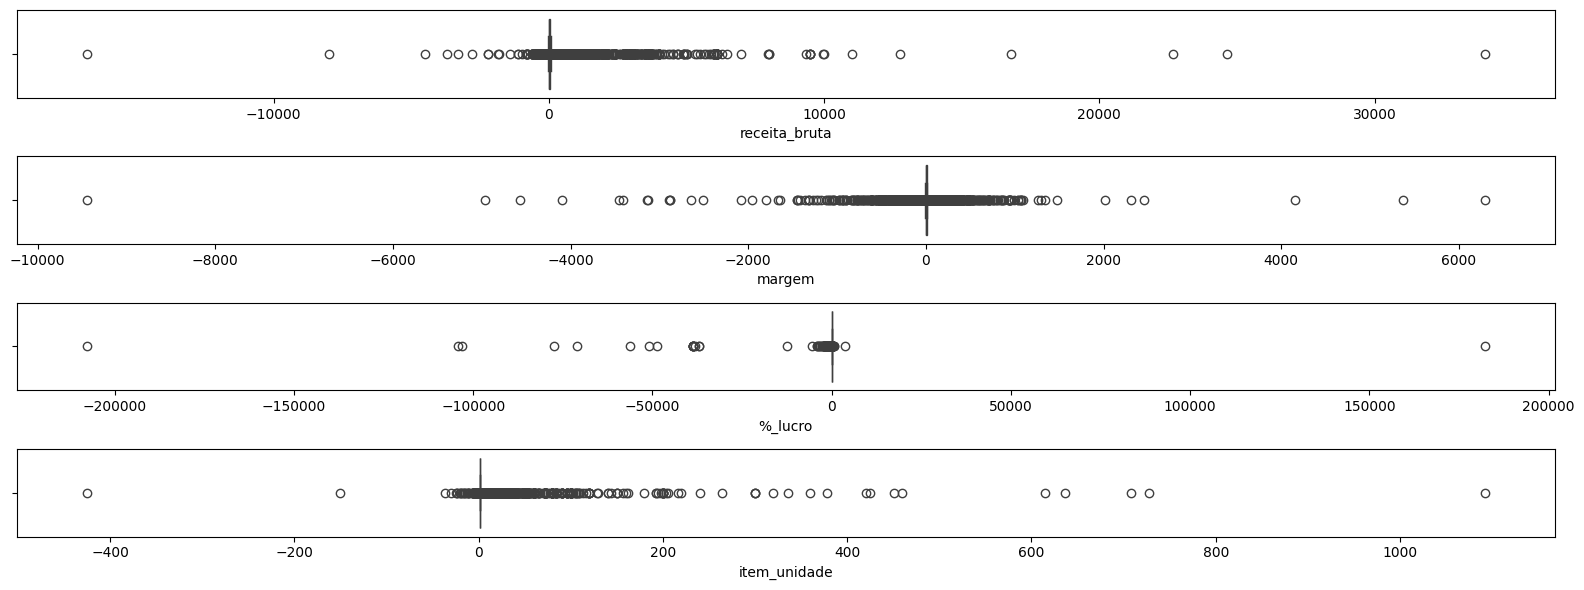

In [14]:
fig, ax = plt.subplots(nrows = 4, figsize = (16, 6))

sns.boxplot(x = df['receita_bruta'], ax = ax[0])
sns.boxplot(x = df['margem'], ax = ax[1])
sns.boxplot(x = df['%_lucro'], ax = ax[2])
sns.boxplot(x = df['item_unidade'], ax = ax[3])

fig.tight_layout()

In [3]:
qtd_de_items_negativo = df[df['item_unidade'] <= 0].shape[0]

print('qtd de items negativos {} representa {} % do total'.format(qtd_de_items_negativo,
                                                                  round((qtd_de_items_negativo/ df.shape[0])*100, 3)))


qtd_de_items_negativo = df[df['receita_bruta'] < 0].shape[0]

print('qtd de receita negativas {} representa {} % do total'.format(qtd_de_items_negativo,
                                                                        round((qtd_de_items_negativo/ df.shape[0])*100, 3)))


qtd_de_items_negativo = df[df['margem'] < 0].shape[0]

print('qtd de margem negativas {} representa {} % do total'.format(qtd_de_items_negativo,
                                                                        round((qtd_de_items_negativo/ df.shape[0])*100, 3)))


qtd_de_items_negativo = df[df['%_lucro'] < 0].shape[0]

print('qtd de % de lucro negativos {} representa {} % do total'.format(qtd_de_items_negativo,
                                                                        round((qtd_de_items_negativo/ df.shape[0])*100, 3)))

qtd de items negativos 3736 representa 0.425 % do total
qtd de receita negativas 1282 representa 0.146 % do total
qtd de margem negativas 68951 representa 7.848 % do total
qtd de % de lucro negativos 68209 representa 7.763 % do total




* Parece fazer sentido ter **margem** ou **%_lucro negativa** em um produto, as vezes uma promoção por produtos próximos do vencimento ou uma mega promoção com relação a aquisição de outros produtos;

* Agora o item_unidade ser negativo não faz muito sentido, seria necessário entender melhor;

* Por enquanto, apagar linhas com item_unidade negativo.


In [4]:
indices = df[df['item_unidade'] <= 0].index
df.drop(labels = indices, axis = 0, inplace = True)

df[[ 'item_unidade', 'receita_bruta', 'margem', '%_lucro']].describe()

,item_unidade,receita_bruta,margem,%_lucro
count,874860.000000,874860.000000,874860.000000,874860.000000
mean,1.487015,32.970982,5.615942,19.741867
std,3.194438,108.254386,26.585977,335.349732
min,1.000000,-42.710000,-9445.030000,-207710.071942
25%,1.000000,11.360000,2.250000,15.870509
50%,1.000000,19.340000,4.130000,24.777518
75%,1.000000,33.660000,7.480000,32.199473
max,1092.000000,34006.250000,6291.290000,3721.052632


* Desvio padrão maior que a média para as 4 variáveis e diferenças entre mediana e média;

* Abaixo isso é notado novamente com o boxplot.

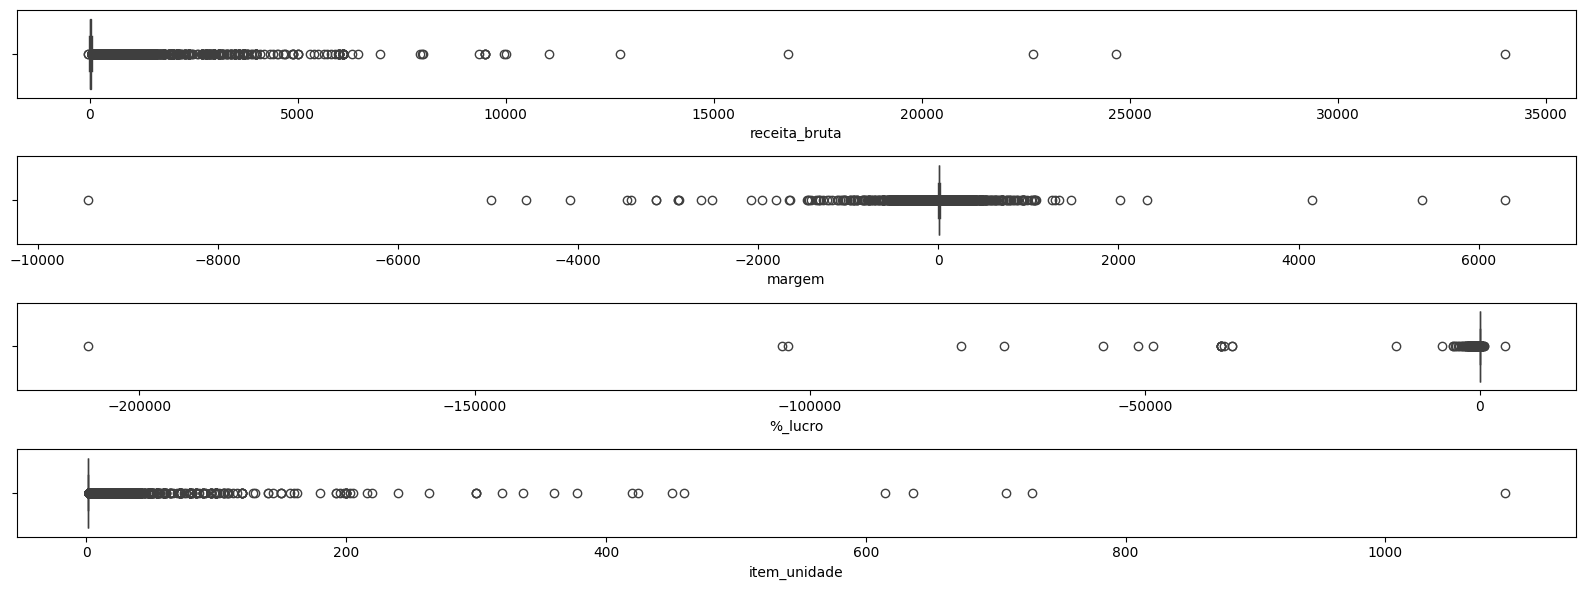

In [24]:
fig, ax = plt.subplots(nrows = 4, figsize = (16, 6))

sns.boxplot(x = df['receita_bruta'], ax = ax[0])
sns.boxplot(x = df['margem'], ax = ax[1])
sns.boxplot(x = df['%_lucro'], ax = ax[2])
sns.boxplot(x = df['item_unidade'], ax = ax[3])

fig.tight_layout()

***************************************

**************************************

## 3. Respondendo: 10 itens de maior relevância e os top 15 itens que acompanham cada um deles

In [26]:
df.head(5)

,periodo,id_clube,socio,canal,ticket,departamento,item_id,item_descricao,item_unidade,receita_bruta,margem,%_lucro
0,2022-01-10,5235,45765100809381908,PISO,4576510080938190820220110,BAZAR E TÊXTIL,1259475,CALCAO,2,81.17,22.43,27.633362
1,2022-01-10,5235,45766100903265726,PISO,4576610090326572620220110,BAZAR E TÊXTIL,1259475,CALCAO,1,41.27,11.90,28.834504
2,2022-01-10,5235,45765100815078019,PISO,4576510081507801920220110,BAZAR E TÊXTIL,1225017,CHAPEU PRAIA,1,51.27,11.10,21.650088
3,2022-01-10,5235,45766100904345030,PISO,4576610090434503020220110,BAZAR E TÊXTIL,1216504,BANCO DOBRAVEL,1,81.34,22.93,28.190312
4,2022-01-10,5235,45766100903286284,PISO,4576610090328628420220110,BAZAR E TÊXTIL,1259473,BERMUDA MOLETOM,2,201.17,46.37,23.050157


### 3.1. Market Basket Analysis



* **Support**: Support (Apoio) é a frequencia que o produto A apareceu nas cestas/ticket dividido pelo número total de transações, em resumo é o percentual que o produto A apareceu nas cestas daquele determinado período;

* **Confidence**: Confidence (Confiança) ÉEscolhendo um item A como support (item com maior frequancia) e verificar das vezes que o item A esta na cesta qual é a chance do item B também estar;

* 
* **Lift**: Confidence (A->B) / Support (B) - resultando na quantidade de vezes a mais que o cliente pode comprar o item Y.

 

#### 3.1.1. Calculo Support A

Os 10 items mais vendidos sao o que aparecem com mais frequência nas cestas (Support)

In [64]:
df.groupby(['item_descricao'])['item_unidade'].sum().sort_values(ascending = False)[0:10] 

item_descricao
SACOLA PLASTICA MM BRANCA              29028
SACOLA PLASTICA MM CINZA                8212
PAPEL TOALHA KITCHEN JUMB FD C360FL     7597
SACOLA PLASTICA MM VERDE                7563
CR DE LEITE PIRACANJUBA TP 200G         7242
OLEO SOJA LIZA PET 900ML                6527
CERV QUILMES CLASSICA LN 340ML          5792
ACUC REF UNIAO 1KG                      5363
PAPEL REPORT MULT A4 BRANCO 500 F       5269
MM LAVA ROUPAS 5LTS ULTIMATE CLEAN      5222
Name: item_unidade, dtype: int64

In [5]:
support_A = df.groupby(['item_descricao'])['item_unidade'].sum().sort_values(ascending = False)[0:10] / df.shape[0]
dic_support_A = dict(support_A)
dic_support_A

{'SACOLA PLASTICA MM BRANCA': 0.03334819285371374,
 'SACOLA PLASTICA MM CINZA': 0.009388930800356628,
 'PAPEL TOALHA KITCHEN JUMB FD C360FL': 0.008732825823560341,
 'SACOLA PLASTICA MM VERDE': 0.008645954781336443,
 'CR DE LEITE PIRACANJUBA TP 200G': 0.008372768214342866,
 'OLEO SOJA LIZA PET 900ML': 0.007901835722286995,
 'CERV QUILMES CLASSICA LN 340ML': 0.00673364881238141,
 'PAPEL REPORT MULT A4 BRANCO 500 F': 0.006707358891708388,
 'ACUC REF UNIAO 1KG': 0.006468463525592666,
 'MM LAVA ROUPAS 5LTS ULTIMATE CLEAN': 0.0060272500742976015}

In [6]:
df_support_A = pd.DataFrame.from_dict(dic_support_A, orient = 'index')
df_support_A.reset_index(inplace = True)
df_support_A.columns = ['antecede', 'support_antecede']

In [7]:
for item in support_A.keys():
    print('\n item {} \n support = {}'.format(item, round(support_A[item], 4)))


 item SACOLA PLASTICA MM BRANCA 
 support = 0.0333

 item SACOLA PLASTICA MM CINZA 
 support = 0.0094

 item PAPEL TOALHA KITCHEN JUMB FD C360FL 
 support = 0.0087

 item SACOLA PLASTICA MM VERDE 
 support = 0.0086

 item CR DE LEITE PIRACANJUBA TP 200G 
 support = 0.0084

 item OLEO SOJA LIZA PET 900ML 
 support = 0.0079

 item CERV QUILMES CLASSICA LN 340ML 
 support = 0.0067

 item PAPEL REPORT MULT A4 BRANCO 500 F 
 support = 0.0067

 item ACUC REF UNIAO 1KG 
 support = 0.0065

 item MM LAVA ROUPAS 5LTS ULTIMATE CLEAN 
 support = 0.006


#### 3.1.2. Calculo Confidence 

In [8]:
#Calculando a Confidence dos 15 items (B) que mais acompanham esses 10 items (A)
qtd_total_de_cestas = df.shape[0]
dic_confidence_values = {}
dic_prob_B_A_na_mesma_cesta = {}

_10_items_mais_relevantes = dic_support_A.keys()

#Iterar em cada um dos 10 items A que os mais relevantes de acordo com a métrica support(P(A))
for item in _10_items_mais_relevantes:

    item_A = item
    
    print(item)

    #filtrar quais cestas que possuem esse item 
    cestas = df[df['item_descricao'] == item_A]['cesta'].values.tolist()
    
    #filtrar apenas essas cestas para análise
    df_cestas = df[df['cesta'].isin(cestas)].copy()

    #contar os items que mais aparecem nessa cesta (pegar os 15 primeiros) 
    qtd_de_items_B_nas_cestas_que_possui_item_A = df_cestas['item_descricao'].value_counts()[0:16]

    #calculando a probabilidade de B estar na cesta se A estiver
    prob_B_A_na_mesma_cesta = qtd_de_items_B_nas_cestas_que_possui_item_A / qtd_total_de_cestas
    
    #pegando valor do support do item A
    support_A = dic_support_A[item]
    
    #calculando a confidence 
    dic_valores = dict(prob_B_A_na_mesma_cesta / support_A)
    
    #excluindo a confianca do item A estar dentro da propria cesta e ser considerado como B
    dic_valores.pop(item_A)
    prob_B_A_na_mesma_cesta.pop(item_A)

    #salvando valores
    dic_confidence_values[item_A] = dic_valores
    dic_prob_B_A_na_mesma_cesta[item_A] = dict(prob_B_A_na_mesma_cesta)
    


SACOLA PLASTICA MM BRANCA
SACOLA PLASTICA MM CINZA
PAPEL TOALHA KITCHEN JUMB FD C360FL
SACOLA PLASTICA MM VERDE
CR DE LEITE PIRACANJUBA TP 200G
OLEO SOJA LIZA PET 900ML
CERV QUILMES CLASSICA LN 340ML
PAPEL REPORT MULT A4 BRANCO 500 F
ACUC REF UNIAO 1KG
MM LAVA ROUPAS 5LTS ULTIMATE CLEAN


In [9]:
#TRANSFORMANDO DICIONARIO EM PANDAS

df_confidence_values = pd.DataFrame.from_dict(dic_confidence_values, orient = 'index')

df_confidence_values['support'] = df_confidence_values.index
df_confidence_values.reset_index(drop = True, inplace = True)

df_confidence_values = pd.melt(df_confidence_values, id_vars = ['support'], value_vars = df_confidence_values.columns.tolist())
df_confidence_values.columns = ['antecede', 'consequencia', 'confidence']

df_confidence_values.head()

,antecede,consequencia,confidence
0,SACOLA PLASTICA MM BRANCA,PAPEL TOALHA KITCHEN JUMB FD C360FL,0.042605
1,SACOLA PLASTICA MM CINZA,PAPEL TOALHA KITCHEN JUMB FD C360FL,0.044802
2,SACOLA PLASTICA MM VERDE,PAPEL TOALHA KITCHEN JUMB FD C360FL,0.030011
3,CR DE LEITE PIRACANJUBA TP 200G,PAPEL TOALHA KITCHEN JUMB FD C360FL,0.049283
4,OLEO SOJA LIZA PET 900ML,PAPEL TOALHA KITCHEN JUMB FD C360FL,0.041227


In [10]:
#TRANSFORMANDO DICIONARIO EM PANDAS

df_prob_B_A_na_mesma_cesta = pd.DataFrame.from_dict(dic_prob_B_A_na_mesma_cesta, orient = 'index')

df_prob_B_A_na_mesma_cesta['support'] = df_prob_B_A_na_mesma_cesta.index
df_prob_B_A_na_mesma_cesta.reset_index(drop = True, inplace = True)

df_prob_B_A_na_mesma_cesta = pd.melt(df_prob_B_A_na_mesma_cesta, id_vars = ['support'], value_vars = df_prob_B_A_na_mesma_cesta.columns.tolist())
df_prob_B_A_na_mesma_cesta.columns = ['antecede', 'consequencia', 'probabilidade de B estar em A']
df_prob_B_A_na_mesma_cesta
df_prob_B_A_na_mesma_cesta.head()

,antecede,consequencia,probabilidade de B estar em A
0,SACOLA PLASTICA MM BRANCA,PAPEL TOALHA KITCHEN JUMB FD C360FL,0.001421
1,SACOLA PLASTICA MM CINZA,PAPEL TOALHA KITCHEN JUMB FD C360FL,0.000421
2,SACOLA PLASTICA MM VERDE,PAPEL TOALHA KITCHEN JUMB FD C360FL,0.000259
3,CR DE LEITE PIRACANJUBA TP 200G,PAPEL TOALHA KITCHEN JUMB FD C360FL,0.000413
4,OLEO SOJA LIZA PET 900ML,PAPEL TOALHA KITCHEN JUMB FD C360FL,0.000326


#### 3.1.3. Calculo Support B 

In [11]:
#calcular o support dos items B (consequencia)

items_consequencia = df_confidence_values['consequencia'].drop_duplicates().tolist()

dic_support_B = {}

for item in items_consequencia:

    item_B = item
    
    print(item)
    #filtrar as cestas que possuem esse item 

    qtd_cestas_q_item_B_aparece = df[df['item_descricao'] == item].shape[0]
    qtd_cestas_total = df.shape[0]
    
    dic_support_B[item] = qtd_cestas_q_item_B_aparece / qtd_cestas_total
    

PAPEL TOALHA KITCHEN JUMB FD C360FL
PAO FRANCES MEMBERS MARK
BANANA PRATA KG
REQUEIJ CREMOSO 500G MEMBERS MARK
MM LAVA ROUPAS 5LTS ULTIMATE CLEAN
PH NEVE FT 20M L32P28UN
MANTEIGA COM SAL MEMBERS MARK 500G
FILE PEITO FRANGO SADIA 1KG ZIP IQF
PH PERSONAL VIP FD 40 ROLOSX30M
OMO LAVA ROUPAS LAVAG PERFEITA 5LT
BISC CH PETIT BEURRE GRIESSON 150G
LEITE FERMENTADO YAKULT 6X80G
REQUEIJAO TRADIC CATUPIRY 500G
ALCOOL LIQ BACT 70 INPM TOPFORM 1L
QJ MUSS INTERFOLHADA KG
SUPER CANDIDA 5LT AGUA SANITARIA
BANANA NANICA KG
ACUC REF UNIAO 1KG
LIMPOL 6X500ML DETERG LIQ NATURAL
MANTEIGA AVIACAO COM SAL POTE 500G
CENOURA KG
BATATA PACOTE 1 KG
SACOLA PLASTICA MM BRANCA
LIMPOL DETERGENTE LOUCA NEUTRO 5LT
FILTRO DE PAPEL120UN MM TAM 103
SACOLA PLASTICA MM CINZA
SUCO DE LARANJA INTEGRAL 2L
BISNAGUINHAS 300G PANCO
LEITE CONDENSADO TP 395G PIRACANJ
LEITE COND MOCA LT 395G
SAL REF CISNE 1KG
CR DE LEITE PIRACANJUBA TP 200G
FJAO CAR CAMIL T1 1KG
KETCHUP HEINZ 1.033KG
BISC POLV SALGADO 300G MEMBERS MARK
CERV HEINEK

In [12]:
df_support_B = pd.DataFrame.from_dict(dic_support_B, orient = 'index')

df_support_B.reset_index(inplace = True)
df_support_B.columns = ['consequencia','support_consequencia']

df_support_B.head()

,consequencia,support_consequencia
0,PAPEL TOALHA KITCHEN JUMB FD C360FL,0.006704
1,PAO FRANCES MEMBERS MARK,0.004372
2,BANANA PRATA KG,0.004113
3,REQUEIJ CREMOSO 500G MEMBERS MARK,0.003658
4,MM LAVA ROUPAS 5LTS ULTIMATE CLEAN,0.004901


#### 3.1.4. Join resultados

In [13]:
df_support_A.head(3)

,antecede,support_antecede
0,SACOLA PLASTICA MM BRANCA,0.033348
1,SACOLA PLASTICA MM CINZA,0.009389
2,PAPEL TOALHA KITCHEN JUMB FD C360FL,0.008733


In [14]:
df_confidence_values.head(3)

,antecede,consequencia,confidence
0,SACOLA PLASTICA MM BRANCA,PAPEL TOALHA KITCHEN JUMB FD C360FL,0.042605
1,SACOLA PLASTICA MM CINZA,PAPEL TOALHA KITCHEN JUMB FD C360FL,0.044802
2,SACOLA PLASTICA MM VERDE,PAPEL TOALHA KITCHEN JUMB FD C360FL,0.030011


In [15]:
df_support_B.head(3)

,consequencia,support_consequencia
0,PAPEL TOALHA KITCHEN JUMB FD C360FL,0.006704
1,PAO FRANCES MEMBERS MARK,0.004372
2,BANANA PRATA KG,0.004113


In [16]:
df_prob_B_A_na_mesma_cesta.head(3)

,antecede,consequencia,probabilidade de B estar em A
0,SACOLA PLASTICA MM BRANCA,PAPEL TOALHA KITCHEN JUMB FD C360FL,0.001421
1,SACOLA PLASTICA MM CINZA,PAPEL TOALHA KITCHEN JUMB FD C360FL,0.000421
2,SACOLA PLASTICA MM VERDE,PAPEL TOALHA KITCHEN JUMB FD C360FL,0.000259


In [17]:
#merge de confidencia com support B (merge deve ser feito utilizando a coluna consequencia)
df_final = pd.merge(left = df_confidence_values, right = df_support_B, on = 'consequencia', how = 'inner')

In [18]:
df_final.head(3)

,antecede,consequencia,confidence,support_consequencia
0,SACOLA PLASTICA MM BRANCA,PAPEL TOALHA KITCHEN JUMB FD C360FL,0.042605,0.006704
1,SACOLA PLASTICA MM CINZA,PAPEL TOALHA KITCHEN JUMB FD C360FL,0.044802,0.006704
2,SACOLA PLASTICA MM VERDE,PAPEL TOALHA KITCHEN JUMB FD C360FL,0.030011,0.006704


In [19]:
#Trazer o valor do support A antecede
df_final = pd.merge(left = df_final, right = df_support_A, on = 'antecede', how = 'inner')
df_final.dropna(inplace = True)

In [20]:
df_final.shape

(150, 5)

In [21]:
df_final = df_final[['antecede', 'consequencia', 'support_antecede', 'support_consequencia','confidence']]

In [22]:
df_final['merge'] = df_final['antecede'] + '-' + df_final['consequencia']
df_prob_B_A_na_mesma_cesta['merge'] = df_prob_B_A_na_mesma_cesta['antecede'] + '-' + df_prob_B_A_na_mesma_cesta['consequencia']

In [23]:
#Trazer o valor da probabilidade de B estar em A
df_final = pd.merge(left = df_final,
                    right = df_prob_B_A_na_mesma_cesta[['merge', 'probabilidade de B estar em A']],
                    on = 'merge', 
                    how = 'inner')

df_final.dropna(inplace = True)

df_final.drop(labels = 'merge', axis = 1, inplace = True)

In [24]:
df_final.head(3)

,antecede,consequencia,support_antecede,support_consequencia,confidence,probabilidade de B estar em A
0,SACOLA PLASTICA MM BRANCA,PAPEL TOALHA KITCHEN JUMB FD C360FL,0.033348,0.006704,0.042605,0.001421
1,SACOLA PLASTICA MM CINZA,PAPEL TOALHA KITCHEN JUMB FD C360FL,0.009389,0.006704,0.044802,0.000421
2,SACOLA PLASTICA MM VERDE,PAPEL TOALHA KITCHEN JUMB FD C360FL,0.008646,0.006704,0.030011,0.000259


In [113]:
df_final[df_final['antecede'] == 'SACOLA PLASTICA MM BRANCA']

,antecede,consequencia,support_antecede,support_consequencia,confidence
0,SACOLA PLASTICA MM BRANCA,PAPEL TOALHA KITCHEN JUMB FD C360FL,0.033205,0.006679,0.042641
10,SACOLA PLASTICA MM BRANCA,PAO FRANCES MEMBERS MARK,0.033205,0.004354,0.033489
20,SACOLA PLASTICA MM BRANCA,BANANA PRATA KG,0.033205,0.004104,0.026908
30,SACOLA PLASTICA MM BRANCA,REQUEIJ CREMOSO 500G MEMBERS MARK,0.033205,0.003655,0.026599
40,SACOLA PLASTICA MM BRANCA,MM LAVA ROUPAS 5LTS ULTIMATE CLEAN,0.033205,0.004885,0.025022
50,SACOLA PLASTICA MM BRANCA,PH NEVE FT 20M L32P28UN,0.033205,0.004399,0.024748
60,SACOLA PLASTICA MM BRANCA,MANTEIGA COM SAL MEMBERS MARK 500G,0.033205,0.002758,0.021800
70,SACOLA PLASTICA MM BRANCA,FILE PEITO FRANGO SADIA 1KG ZIP IQF,0.033205,0.002779,0.020018
80,SACOLA PLASTICA MM BRANCA,PH PERSONAL VIP FD 40 ROLOSX30M,0.033205,0.004177,0.019915
90,SACOLA PLASTICA MM BRANCA,OMO LAVA ROUPAS LAVAG PERFEITA 5LT,0.033205,0.003458,0.019881


In [25]:
df_final['lift'] = df_final['probabilidade de B estar em A'] / (df_final['support_consequencia'] * df_final['support_antecede'])

In [26]:
df_final['lift_'] =  df_final['confidence'] / df_final['support_consequencia'] 




In [40]:
df.shape

(874860, 13)

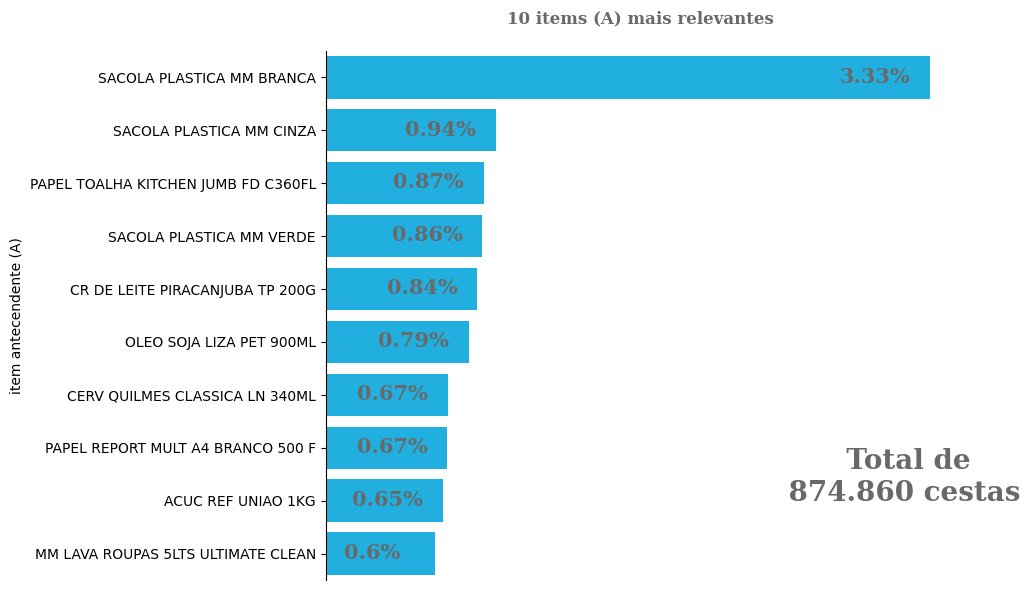

In [106]:
font = FontProperties()
font.set_family('serif')
font.set_name('serif')
font.set_weight('bold')
font.set_size(15)

font1 = FontProperties()
font1.set_family('serif')
font1.set_name('serif')
font1.set_weight('bold')
font1.set_size(20)

font2 = FontProperties()
font2.set_family('serif')
font2.set_name('serif')
font2.set_weight('bold')
font2.set_size(12)


x = df_support_A['support_antecede'] * 100
y = df_support_A['antecede']

fig, ax = plt.subplots(figsize = (10, 6))

sns.barplot(x = x, y = y, ax = ax, color = '#00BFFF')

ax.set_title('10 items (A) mais relevantes \n', fontproperties = font2, color = '#696969')

ax.set_ylabel('item antecendente (A)')

for axis in ['bottom', 'right', 'top']:
    ax.spines[axis].set_color(None)

ax.tick_params(axis = 'x', labelbottom = False, bottom = False)

ax.set_xlabel('')

for i in range(0, len(x), 1):
    ax.text(x = x[i] - 0.50, y = i + 0.1, s = str(round(x[i], 2)) + '%', fontproperties = font, color = '#696969')

ax.text(x = 2.5, y = 8, s = '       Total de \n 874.860 cestas',  fontproperties = font1, color = '#696969')

fig.tight_layout();

fig.savefig('10_items_mais_relevantes.png', dpi = 300)

In [36]:
df_final.sort_values(by = 'lift')[0:15]

,antecede,consequencia,support_antecede,support_consequencia,confidence,probabilidade de B estar em A,lift,lift_
12,CERV QUILMES CLASSICA LN 340ML,PAO FRANCES MEMBERS MARK,0.006734,0.004372,0.004753,0.000032,1.087117,1.087117
5,CERV QUILMES CLASSICA LN 340ML,PAPEL TOALHA KITCHEN JUMB FD C360FL,0.006734,0.006704,0.007978,0.000054,1.190089,1.190089
19,CERV QUILMES CLASSICA LN 340ML,BANANA PRATA KG,0.006734,0.004113,0.005262,0.000035,1.279529,1.279529
34,CERV QUILMES CLASSICA LN 340ML,MM LAVA ROUPAS 5LTS ULTIMATE CLEAN,0.006734,0.004901,0.006620,0.000045,1.350701,1.350701
26,CERV QUILMES CLASSICA LN 340ML,REQUEIJ CREMOSO 500G MEMBERS MARK,0.006734,0.003658,0.005093,0.000034,1.392262,1.392262
62,CERV QUILMES CLASSICA LN 340ML,PH PERSONAL VIP FD 40 ROLOSX30M,0.006734,0.004189,0.006111,0.000041,1.458741,1.458741
43,CERV QUILMES CLASSICA LN 340ML,PH NEVE FT 20M L32P28UN,0.006734,0.004414,0.006451,0.000043,1.461238,1.461238
109,CERV QUILMES CLASSICA LN 340ML,LIMPOL 6X500ML DETERG LIQ NATURAL,0.006734,0.002838,0.004414,0.000030,1.555056,1.555056
72,CERV QUILMES CLASSICA LN 340ML,OMO LAVA ROUPAS LAVAG PERFEITA 5LT,0.006734,0.003467,0.005432,0.000037,1.566849,1.566849
120,CERV QUILMES CLASSICA LN 340ML,SACOLA PLASTICA MM BRANCA,0.006734,0.015158,0.026821,0.000181,1.769418,1.769418


In [38]:
df_final[df_final['antecede'] == 'CERV QUILMES CLASSICA LN 340ML'].sort_values(by = 'lift', ascending =  False)[0:10]

,antecede,consequencia,support_antecede,support_consequencia,confidence,probabilidade de B estar em A,lift,lift_
143,CERV QUILMES CLASSICA LN 340ML,CERV HEINEKEN LN 6X330ML,0.006734,0.000558,0.004244,0.000029,7.607986,7.607986
141,CERV QUILMES CLASSICA LN 340ML,KETCHUP HEINZ 1.033KG,0.006734,0.001347,0.005262,0.000035,3.908102,3.908102
77,CERV QUILMES CLASSICA LN 340ML,BISC CH PETIT BEURRE GRIESSON 150G,0.006734,0.002450,0.006960,0.000047,2.841262,2.841262
142,CERV QUILMES CLASSICA LN 340ML,BISC POLV SALGADO 300G MEMBERS MARK,0.006734,0.001844,0.004414,0.000030,2.393804,2.393804
55,CERV QUILMES CLASSICA LN 340ML,FILE PEITO FRANGO SADIA 1KG ZIP IQF,0.006734,0.002787,0.005093,0.000034,1.827415,1.827415
120,CERV QUILMES CLASSICA LN 340ML,SACOLA PLASTICA MM BRANCA,0.006734,0.015158,0.026821,0.000181,1.769418,1.769418
72,CERV QUILMES CLASSICA LN 340ML,OMO LAVA ROUPAS LAVAG PERFEITA 5LT,0.006734,0.003467,0.005432,0.000037,1.566849,1.566849
109,CERV QUILMES CLASSICA LN 340ML,LIMPOL 6X500ML DETERG LIQ NATURAL,0.006734,0.002838,0.004414,0.000030,1.555056,1.555056
43,CERV QUILMES CLASSICA LN 340ML,PH NEVE FT 20M L32P28UN,0.006734,0.004414,0.006451,0.000043,1.461238,1.461238
62,CERV QUILMES CLASSICA LN 340ML,PH PERSONAL VIP FD 40 ROLOSX30M,0.006734,0.004189,0.006111,0.000041,1.458741,1.458741


In [34]:
df_final.sort_values(by = 'lift', ascending =  False)[0:10]

,antecede,consequencia,support_antecede,support_consequencia,confidence,probabilidade de B estar em A,lift,lift_
132,CR DE LEITE PIRACANJUBA TP 200G,LEITE CONDENSADO TP 395G PIRACANJ,0.008373,0.001180,0.044642,0.000374,37.844170,37.844170
147,MM LAVA ROUPAS 5LTS ULTIMATE CLEAN,AGUA SANITARIA 5LT MEMBERS MARK,0.006027,0.001306,0.048549,0.000293,37.159899,37.159899
149,MM LAVA ROUPAS 5LTS ULTIMATE CLEAN,MON BIJOU PUREZA 5LT AMAC DILUIDO,0.006027,0.001372,0.047032,0.000283,34.288716,34.288716
137,ACUC REF UNIAO 1KG,SAL REF CISNE 1KG,0.006468,0.001421,0.045591,0.000295,32.088354,32.088354
127,PAPEL TOALHA KITCHEN JUMB FD C360FL,FILTRO DE PAPEL120UN MM TAM 103,0.008733,0.001622,0.050262,0.000439,30.988034,30.988034
126,PAPEL TOALHA KITCHEN JUMB FD C360FL,LIMPOL DETERGENTE LOUCA NEUTRO 5LT,0.008733,0.001934,0.055890,0.000488,28.898328,28.898328
117,SACOLA PLASTICA MM CINZA,BATATA PACOTE 1 KG,0.009389,0.000580,0.016557,0.000155,28.570301,28.570301
99,PAPEL TOALHA KITCHEN JUMB FD C360FL,SUPER CANDIDA 5LT AGUA SANITARIA,0.008733,0.002264,0.064660,0.000565,28.555362,28.555362
148,MM LAVA ROUPAS 5LTS ULTIMATE CLEAN,PH ROYAL CARE FD FD 40 ROLOS X 30M,0.006027,0.001704,0.048549,0.000293,28.486764,28.486764
92,PAPEL TOALHA KITCHEN JUMB FD C360FL,ALCOOL LIQ BACT 70 INPM TOPFORM 1L,0.008733,0.002267,0.064267,0.000561,28.353324,28.353324
